In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


In [ ]:
df= pd.read_csv("sleep.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.isnull().any()

,0
Person ID,False
Gender,False
Age,False
Occupation,False
Sleep Duration,False
Quality of Sleep,False
Physical Activity Level,False
Stress Level,False
BMI Category,False
Blood Pressure,False


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
unique = {
     "Age": df["Age"].unique(),
    "Occupation": df["Occupation"].unique(),
    "Quality of Sleep": df["Quality of Sleep"].unique(),
    "Physical Activity Level": df["Physical Activity Level"].unique(),
    "Stress Level": df["Stress Level"].unique(),
    "BMI Category": df["BMI Category"].unique(),
    "Heart Rate": df["Heart Rate"].unique(),
    "Blood Pressure": df["Blood Pressure"].unique(),
    "Daily Steps": df["Daily Steps"].unique(),
    "Sleep Disorder": df["Sleep Disorder"].unique()
}
unique_deger_df = pd.DataFrame(unique.items(),
                               columns=['Sütun Adı', 'Benzersiz Değerler'])
unique_deger_df

,Sütun Adı,Benzersiz Değerler
0,Age,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
1,Occupation,"[Software Engineer, Doctor, Sales Representati..."
2,Quality of Sleep,"[6, 4, 7, 5, 8, 9]"
3,Physical Activity Level,"[42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 5..."
4,Stress Level,"[6, 8, 7, 4, 3, 5]"
5,BMI Category,"[Overweight, Normal, Obese, Normal Weight]"
6,Heart Rate,"[77, 75, 85, 82, 70, 80, 78, 69, 72, 68, 76, 8..."
7,Blood Pressure,"[126/83, 125/80, 140/90, 120/80, 132/87, 130/8..."
8,Daily Steps,"[4200, 10000, 3000, 3500, 8000, 4000, 4100, 68..."
9,Sleep Disorder,"[nan, Sleep Apnea, Insomnia]"


In [ ]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("No Disorder")

In [ ]:
df.isnull().any()

,0
Person ID,False
Gender,False
Age,False
Occupation,False
Sleep Duration,False
Quality of Sleep,False
Physical Activity Level,False
Stress Level,False
BMI Category,False
Blood Pressure,False


In [ ]:
unique = {
     "Age": df["Age"].unique(),
    "Occupation": df["Occupation"].unique(),
    "Quality of Sleep": df["Quality of Sleep"].unique(),
    "Physical Activity Level": df["Physical Activity Level"].unique(),
    "Stress Level": df["Stress Level"].unique(),
    "BMI Category": df["BMI Category"].unique(),
    "Heart Rate": df["Heart Rate"].unique(),
    "Blood Pressure": df["Blood Pressure"].unique(),
    "Daily Steps": df["Daily Steps"].unique(),
    "Sleep Disorder": df["Sleep Disorder"].unique()
}
unique_deger_df = pd.DataFrame(unique.items(),
                               columns=['Sütun Adı', 'Benzersiz Değerler'])
unique_deger_df


,Sütun Adı,Benzersiz Değerler
0,Age,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
1,Occupation,"[Software Engineer, Doctor, Sales Representati..."
2,Quality of Sleep,"[6, 4, 7, 5, 8, 9]"
3,Physical Activity Level,"[42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 5..."
4,Stress Level,"[6, 8, 7, 4, 3, 5]"
5,BMI Category,"[Overweight, Normal, Obese, Normal Weight]"
6,Heart Rate,"[77, 75, 85, 82, 70, 80, 78, 69, 72, 68, 76, 8..."
7,Blood Pressure,"[126/83, 125/80, 140/90, 120/80, 132/87, 130/8..."
8,Daily Steps,"[4200, 10000, 3000, 3500, 8000, 4000, 4100, 68..."
9,Sleep Disorder,"[No Disorder, Sleep Apnea, Insomnia]"


In [ ]:
df[["BloodPressure_Upper_Value", "BloodPressure_Lower_Value"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)
df.drop("Blood Pressure", axis=1, inplace=True)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


# **GRAFİKLER**


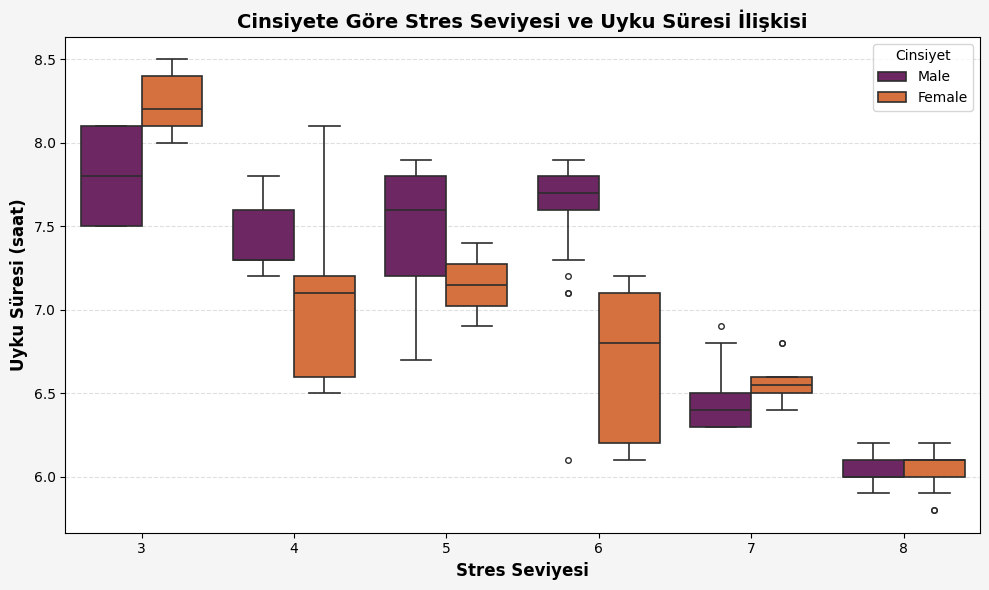

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.gcf().patch.set_facecolor("#f5f5f5")
ax.set_facecolor("#ffffff")
sns.boxplot(
    x='Stress Level',
    y='Sleep Duration',
    data=df,
    hue='Gender',
    palette='inferno',
    linewidth=1.2,
    fliersize=4
)
plt.title(
    "Cinsiyete Göre Stres Seviyesi ve Uyku Süresi İlişkisi",
    fontsize=14,
    fontweight="bold"
)

plt.xlabel("Stres Seviyesi", fontsize=12, fontweight="bold")
plt.ylabel("Uyku Süresi (saat)", fontsize=12, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Cinsiyet")

plt.tight_layout()
plt.show()


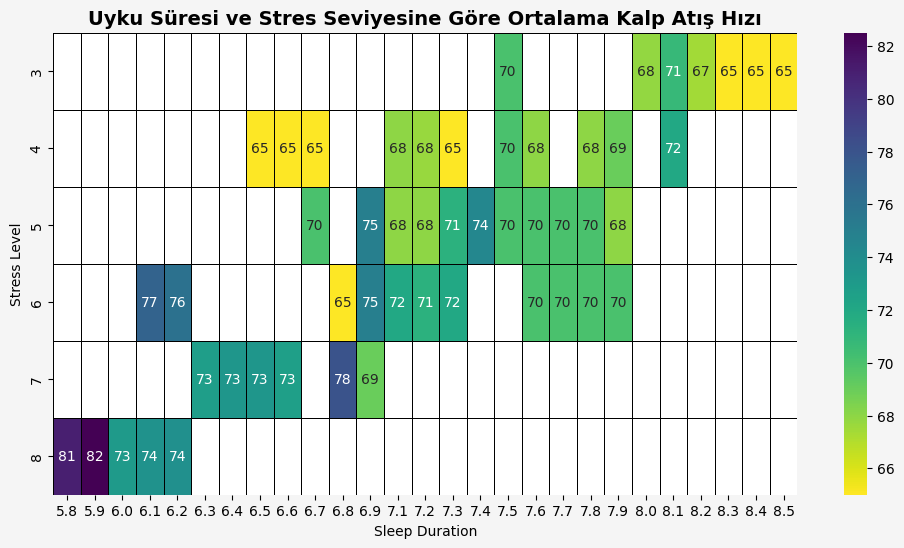

In [ ]:
data = df.groupby(["Sleep Duration", "Stress Level"])["Heart Rate"].mean().reset_index()
pivot = data.pivot(index="Stress Level",
                   columns="Sleep Duration",
                   values="Heart Rate")
plt.figure(figsize=(12,6))
plt.gcf().patch.set_facecolor("#f5f5f5")
ax.set_facecolor("#ffffff")
sns.heatmap(
    pivot,
    annot=True,
    cmap="viridis_r",
    linewidths=0.4,
    linecolor="black")
plt.title("Uyku Süresi ve Stres Seviyesine Göre Ortalama Kalp Atış Hızı", fontsize=14, fontweight="bold")
plt.show()


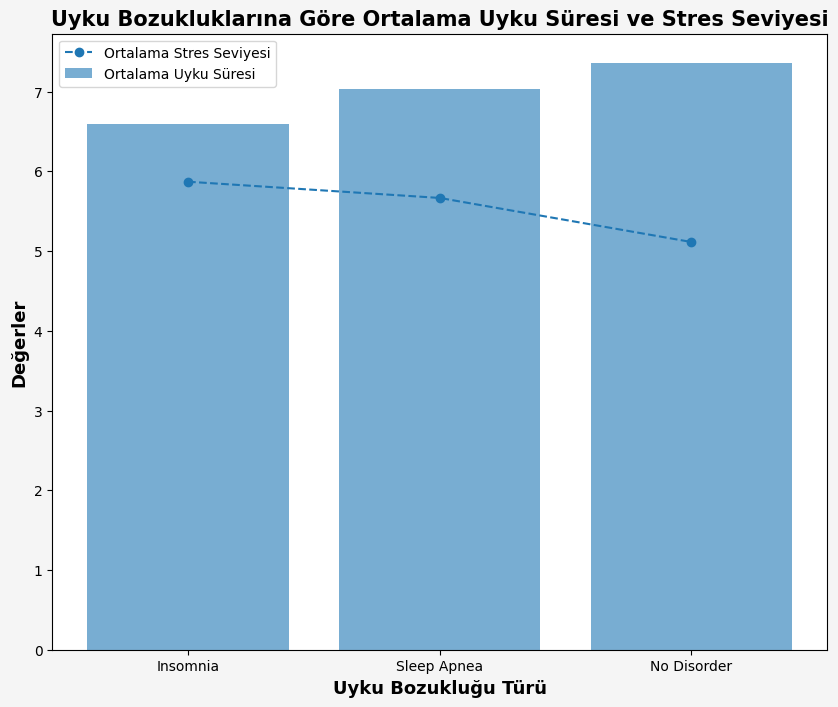

In [ ]:
ortalama = df.groupby("Sleep Disorder")[["Sleep Duration",  "Stress Level"]].mean()
ortalama = ortalama.reset_index()
ortalama = ortalama.sort_values(by="Sleep Duration")
plt.figure(figsize=(10, 8))
plt.gcf().patch.set_facecolor("#f5f5f5")
ax.set_facecolor("#ffffff")
plt.bar(
    ortalama["Sleep Disorder"],
    ortalama["Sleep Duration"],
    label="Ortalama Uyku Süresi",
    alpha=0.6)

plt.plot(
    ortalama["Sleep Disorder"],
    ortalama["Stress Level"],
    marker="o",
    linestyle="--",
    label="Ortalama Stres Seviyesi")
plt.title("Uyku Bozukluklarına Göre Ortalama Uyku Süresi ve Stres Seviyesi", fontsize=15, fontweight= "bold")
plt.xlabel("Uyku Bozukluğu Türü", fontsize=13, fontweight="bold")
plt.ylabel("Değerler", fontsize=13, fontweight="bold")
plt.legend()
plt.show()

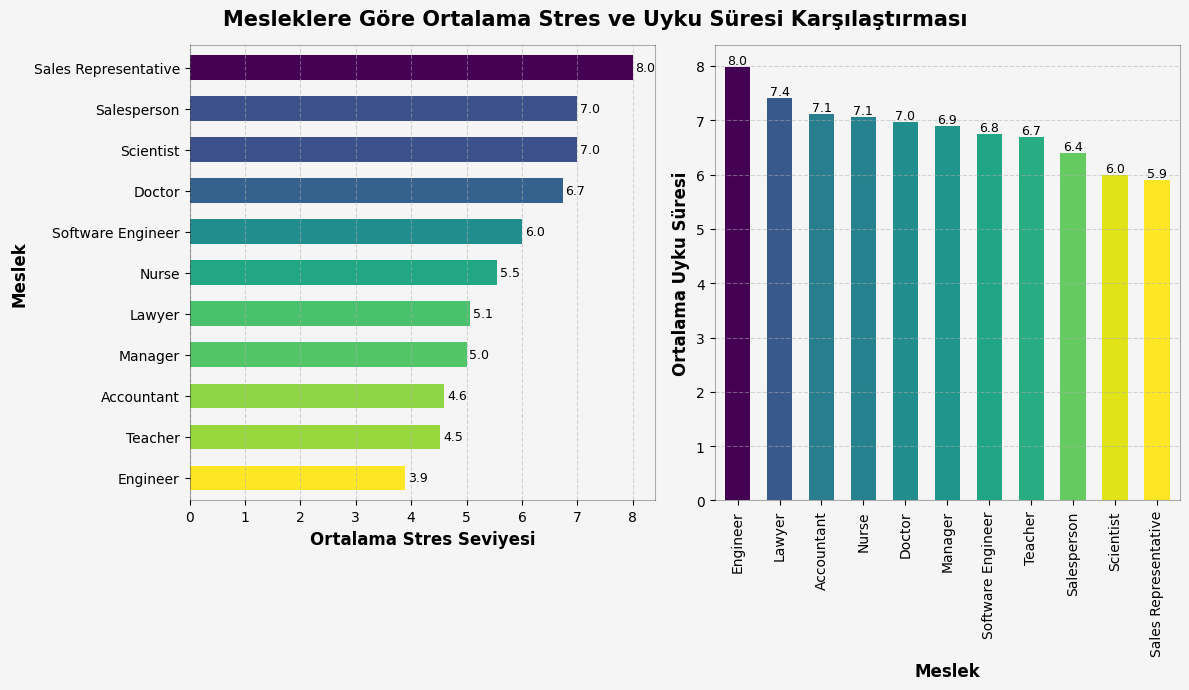

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
fig.patch.set_facecolor("#f5f5f5")
for ax in axes:
    ax.set_facecolor("#f5f5f5")
avg_stress_occ = df.groupby("Occupation")["Stress Level"].mean().sort_values()

values_stress = avg_stress_occ.values
norm_stress = mcolors.Normalize(vmin=values_stress.min(), vmax=values_stress.max())
colors_stress = cm.viridis_r(norm_stress(values_stress))

avg_stress_occ.plot(
    kind="barh",
    ax=axes[0],
    color=colors_stress,
    width=0.6)

axes[0].set_xlabel("Ortalama Stres Seviyesi", fontsize=12,fontweight="bold")
axes[0].set_ylabel("Meslek", fontsize=12,fontweight="bold")

for i, v in enumerate(values_stress):
    axes[0].text(v + 0.05, i, f"{v:.1f}", va='center', fontsize=9)

axes[0].grid(axis='x', linestyle='--', alpha=0.5)


avg_by_occupation = df.groupby("Occupation")["Sleep Duration"] \
                      .mean().sort_values(ascending=False)

values_sleep = avg_by_occupation.values
norm_sleep = mcolors.Normalize(vmin=values_sleep.min(), vmax=values_sleep.max())
colors_sleep  = cm.viridis_r(norm_sleep(values_sleep))

avg_by_occupation.plot(
    kind="bar",
    ax=axes[1],
    color=colors_sleep,
    width=0.6)

axes[1].set_xlabel("Meslek", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Ortalama Uyku Süresi", fontsize=12, fontweight="bold")
axes[1].tick_params(axis='x', rotation=90)

for i, v in enumerate(values_sleep):
    axes[1].text(i, v + 0.05, f"{v:.1f}", ha='center', fontsize=9)

axes[1].grid(axis='y', linestyle='--', alpha=0.5)

fig.suptitle(
    "Mesleklere Göre Ortalama Stres ve Uyku Süresi Karşılaştırması",
    fontsize=15,
    fontweight="bold")

for ax in axes:
    for spine in ax.spines.values():
        spine.set_alpha(0.3)

plt.tight_layout()
plt.show()

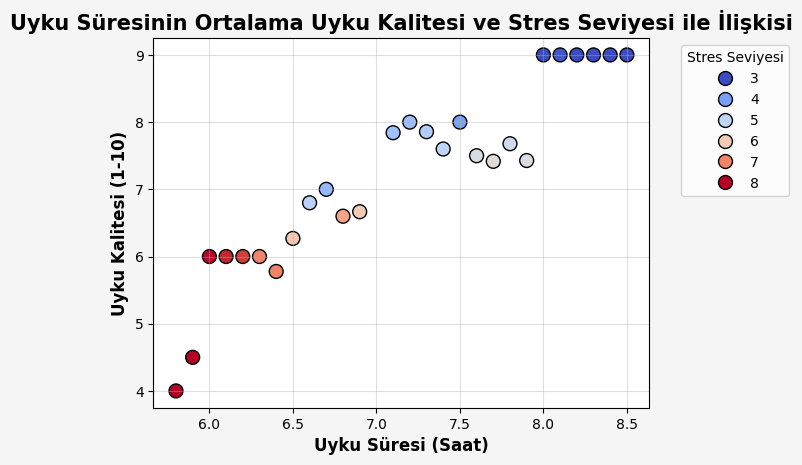

In [ ]:
data = df.groupby("Sleep Duration")[["Stress Level", "Quality of Sleep"]].mean()
plt.gcf().patch.set_facecolor("#f5f5f5")
ax.set_facecolor("#ffffff")
sns.scatterplot(x=data.index ,
                y=data["Quality of Sleep"],
                hue=data["Stress Level"],palette="coolwarm", s=100,
               edgecolor="black",linewidth=1.0)
plt.title("Uyku Süresinin Ortalama Uyku Kalitesi ve Stres Seviyesi ile İlişkisi", fontsize=15, fontweight="bold")
plt.xlabel("Uyku Süresi (Saat)", fontsize=12, fontweight="bold")
plt.ylabel("Uyku Kalitesi (1-10)", fontsize=12, fontweight="bold")
plt.grid(True, alpha=0.4)
plt.legend(
    title="Stres Seviyesi",
    loc="upper left",
    bbox_to_anchor=(1.05, 1))

/tmp/ipython-input-2879473292.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-2879473292.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


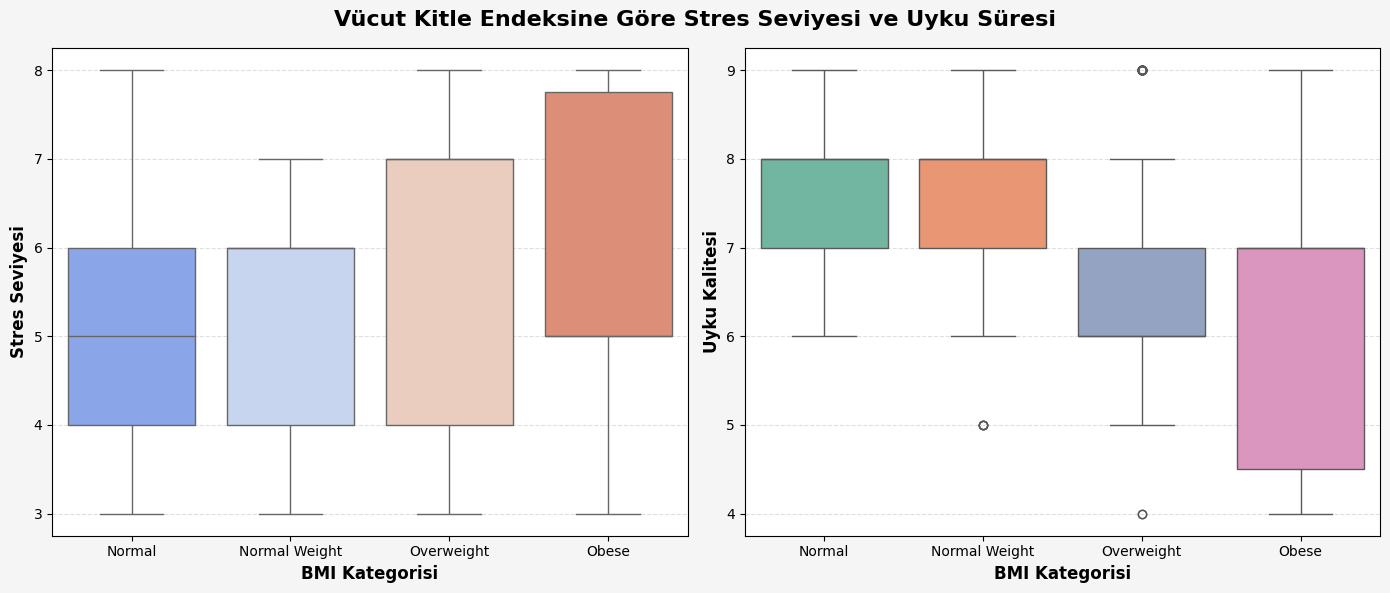

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor("#f5f5f5")
quality_order = (
    df.groupby("BMI Category")["Quality of Sleep"].mean()
    .sort_values(ascending=False)
    .index.tolist()
)

sns.boxplot(
    x="BMI Category",
    y="Stress Level",
    data=df,
    palette="coolwarm",
    ax=axes[0],order=quality_order)

axes[0].set_xlabel("BMI Kategorisi", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Stres Seviyesi", fontsize=12, fontweight="bold")

sns.boxplot(
    x="BMI Category",
    y="Quality of Sleep",
    data=df,
    palette="Set2",
    ax=axes[1],order=quality_order)

axes[1].set_xlabel("BMI Kategorisi", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Uyku Kalitesi", fontsize=12, fontweight="bold")

axes[1].grid(axis="y", linestyle="--", alpha=0.4)
axes[0].grid(axis='y', linestyle='--', alpha=0.4)

fig.suptitle(
    "Vücut Kitle Endeksine Göre Stres Seviyesi ve Uyku Süresi",
    fontsize=16,
    fontweight="bold")
plt.tight_layout()
plt.show()


# **Makine Öğrenmesi-Sınıflandırma**

***Lojistik Regresyon ile Uyku Bozukluğu Tahmini***

Tüm veri:
 Sleep Disorder
No Disorder    0.585561
Sleep Apnea    0.208556
Insomnia       0.205882
Name: proportion, dtype: float64 

Train:
 Sleep Disorder
No Disorder    0.585284
Sleep Apnea    0.207358
Insomnia       0.207358
Name: proportion, dtype: float64 

Test:
 Sleep Disorder
No Disorder    0.586667
Sleep Apnea    0.213333
Insomnia       0.200000
Name: proportion, dtype: float64
=== Train vs Test (Overfitting Check) ===
Train Accuracy: 0.9097
Test  Accuracy: 0.9333
Train Macro-F1: 0.8923
Test  Macro-F1: 0.9076

Accuracy gap (train-test): -0.0236
Macro-F1 gap (train-test): -0.0153

=== TEST Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.92      0.80      0.86        15
 No Disorder       1.00      0.95      0.98        44
 Sleep Apnea       0.80      1.00      0.89        16

    accuracy                           0.93        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.94      0.93      0.93

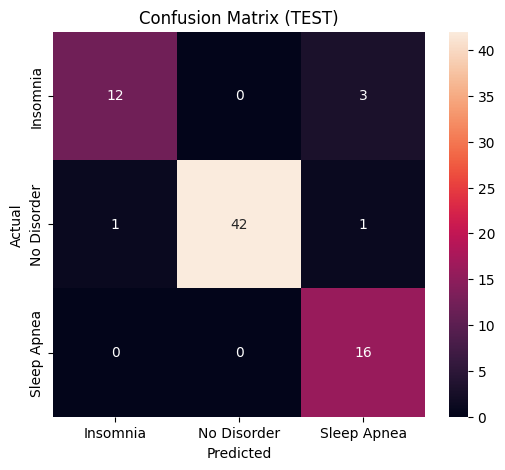


=== 5-Fold Stratified CV (Overfitting Check) ===
CV Train acc mean: 0.9265
CV Test  acc mean: 0.9090
CV Train f1  mean: 0.9107
CV Test  f1  mean: 0.8881

CV acc gap (train-test): 0.0174
CV f1  gap (train-test): 0.0227


In [ ]:
y = df["Sleep Disorder"]#hedef değişken
X = df.drop(["Person ID", "Sleep Disorder"], axis=1) #PersonID ve hedef sütunu çıkarıldı.
categorical_cols = ["Gender", "Occupation", "BMI Category"] #metin olan sütunlar(one-hot yapılacak
numeric_cols = [c for c in X.columns if c not in categorical_cols] #numeric olan sütunlar ile kategorik sütunları ayırdık
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),#kategorik sütunları sayısal hale getirme işlemi
    ]
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y #sınıf dağılımını korur.
)

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=2000))
])
print("Tüm veri:\n", y.value_counts(normalize=True), "\n") #sınıf oranlarını yüzdesel gösterir.
print("Train:\n", y_train.value_counts(normalize=True), "\n")
print("Test:\n", y_test.value_counts(normalize=True))

#--------------------------------------------------------------------------------
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test  = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc  = accuracy_score(y_test, y_pred_test)

train_f1 = f1_score(y_train, y_pred_train, average="macro")
test_f1  = f1_score(y_test, y_pred_test, average="macro")

print("=== Train vs Test (Overfitting Check) ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test  Accuracy: {test_acc:.4f}")
print(f"Train Macro-F1: {train_f1:.4f}")
print(f"Test  Macro-F1: {test_f1:.4f}")
print(f"\nAccuracy gap (train-test): {(train_acc-test_acc):.4f}")
print(f"Macro-F1 gap (train-test): {(train_f1-test_f1):.4f}")

print("\n=== TEST Classification Report ===")
print(classification_report(y_test, y_pred_test))

labels = clf.named_steps["model"].classes_
cm = confusion_matrix(y_test, y_pred_test, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix (TEST)")
plt.show()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    clf, X, y,
    cv=cv,
    scoring={"acc":"accuracy", "f1":"f1_macro"},
    return_train_score=True,
    n_jobs=-1
)

print("\n=== 5-Fold Stratified CV (Overfitting Check) ===")
print(f"CV Train acc mean: {scores['train_acc'].mean():.4f}")
print(f"CV Test  acc mean: {scores['test_acc'].mean():.4f}")
print(f"CV Train f1  mean: {scores['train_f1'].mean():.4f}")
print(f"CV Test  f1  mean: {scores['test_f1'].mean():.4f}")
print(f"\nCV acc gap (train-test): {(scores['train_acc'].mean()-scores['test_acc'].mean()):.4f}")
print(f"CV f1  gap (train-test): {(scores['train_f1'].mean()-scores['test_f1'].mean()):.4f}")


***Random Forest ile Uyku Bozukluğu Tahmini***

=== Random Forest: Train vs Test (Overfitting Check) ===
Train Accuracy: 0.9264
Test  Accuracy: 0.9467
Train Macro-F1: 0.9141
Test  Macro-F1: 0.9214

Accuracy gap (train-test): -0.0202
Macro-F1 gap (train-test): -0.0074

=== TEST Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.87      0.87      0.87        15
 No Disorder       1.00      0.98      0.99        44
 Sleep Apnea       0.88      0.94      0.91        16

    accuracy                           0.95        75
   macro avg       0.92      0.93      0.92        75
weighted avg       0.95      0.95      0.95        75


=== TEST Confusion Matrix ===
[[13  0  2]
 [ 1 43  0]
 [ 1  0 15]]


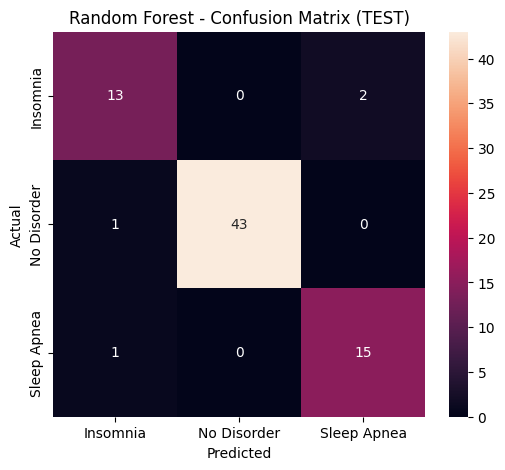


=== 5-Fold Stratified CV (Overfitting Check) ===
CV Train acc mean: 0.9352
CV Test  acc mean: 0.9065
CV Train f1  mean: 0.9231
CV Test  f1  mean: 0.8826

CV acc gap (train-test): 0.0287
CV f1  gap (train-test): 0.0405


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, f1_score
)

y = df["Sleep Disorder"]
X = df.drop(["Person ID", "Sleep Disorder"], axis=1)

categorical_cols = ["Gender", "Occupation", "BMI Category"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

pred_train = rf_model.predict(X_train)
pred_test  = rf_model.predict(X_test)

train_acc = accuracy_score(y_train, pred_train)
test_acc  = accuracy_score(y_test, pred_test)

train_f1 = f1_score(y_train, pred_train, average="macro")
test_f1  = f1_score(y_test, pred_test, average="macro")

print("=== Random Forest: Train vs Test (Overfitting Check) ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test  Accuracy: {test_acc:.4f}")
print(f"Train Macro-F1: {train_f1:.4f}")
print(f"Test  Macro-F1: {test_f1:.4f}")
print(f"\nAccuracy gap (train-test): {(train_acc - test_acc):.4f}")
print(f"Macro-F1 gap (train-test): {(train_f1 - test_f1):.4f}")

print("\n=== TEST Classification Report ===")
print(classification_report(y_test, pred_test))

print("\n=== TEST Confusion Matrix ===")
cm = confusion_matrix(y_test, pred_test, labels=rf_model.named_steps["clf"].classes_)
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=rf_model.named_steps["clf"].classes_,
            yticklabels=rf_model.named_steps["clf"].classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Random Forest - Confusion Matrix (TEST)")
plt.show()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    rf_model, X, y,
    cv=cv,
    scoring={"acc": "accuracy", "f1": "f1_macro"},
    return_train_score=True,
    n_jobs=-1
)

print("\n=== 5-Fold Stratified CV (Overfitting Check) ===")
print(f"CV Train acc mean: {scores['train_acc'].mean():.4f}")
print(f"CV Test  acc mean: {scores['test_acc'].mean():.4f}")
print(f"CV Train f1  mean: {scores['train_f1'].mean():.4f}")
print(f"CV Test  f1  mean: {scores['test_f1'].mean():.4f}")
print(f"\nCV acc gap (train-test): {(scores['train_acc'].mean() - scores['test_acc'].mean()):.4f}")
print(f"CV f1  gap (train-test): {(scores['train_f1'].mean() - scores['test_f1'].mean()):.4f}")


## **Makine Öğrenmesi-Regresyon**




***Lineer Regresyon ve Ridge Regresyonu ile Uyku Kalitesi Tahmini***

MODEL RESULTS
------------------------
Linear Regression
RMSE: 0.221
MAE : 0.122
R2  : 0.968

Ridge Regression (alpha = 1.0)
RMSE: 0.211
MAE : 0.139
R2  : 0.971


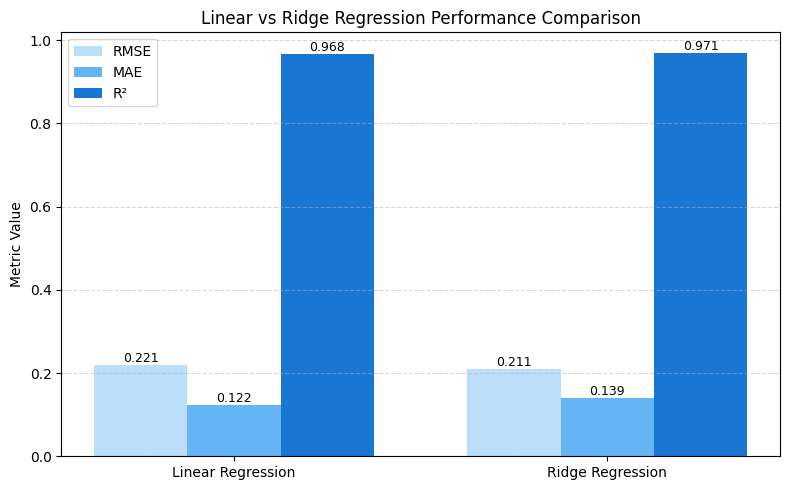

In [ ]:
numeric_features = [
    "Age",
    "Sleep Duration",
    "Physical Activity Level",
    "Stress Level",
    "Heart Rate",
    "Daily Steps",
    "BloodPressure_Upper_Value",
    "BloodPressure_Lower_Value"
]

categorical_features = ["Gender", "Occupation"]

ordinal_features = ["BMI Category"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("ord", OrdinalEncoder(
            categories=[["Normal", "Normal Weight", "Overweight", "Obese"]]
        ), ordinal_features)
    ]
)

linear_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

X = df.drop(columns=["Quality of Sleep", "Person ID"])
y = df["Quality of Sleep"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)
y_pred_ridge  = ridge_model.predict(X_test)


def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

rmse_l, mae_l, r2_l = evaluate(y_test, y_pred_linear)
rmse_r, mae_r, r2_r = evaluate(y_test, y_pred_ridge)

print("MODEL RESULTS")
print("------------------------")

print("Linear Regression")
print("RMSE:", round(rmse_l, 3))
print("MAE :", round(mae_l, 3))
print("R2  :", round(r2_l, 3))

print()

print("Ridge Regression (alpha = 1.0)")
print("RMSE:", round(rmse_r, 3))
print("MAE :", round(mae_r, 3))
print("R2  :", round(r2_r, 3))


models = ["Linear Regression", "Ridge Regression"]

rmse_values = [rmse_l, rmse_r]
mae_values  = [mae_l, mae_r]
r2_values   = [r2_l, r2_r]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8, 5))

bars_rmse = plt.bar(x - width, rmse_values, width, label="RMSE", color="#bbdefb")
bars_mae  = plt.bar(x,         mae_values,  width, label="MAE",  color="#64b5f6")
bars_r2   = plt.bar(x + width, r2_values,   width, label="R²",  color="#1976d2")

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

add_labels(bars_rmse)
add_labels(bars_mae)
add_labels(bars_r2)

plt.xticks(x, models)
plt.ylabel("Metric Value")
plt.title("Linear vs Ridge Regression Performance Comparison")

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


***Random Forest ve Decision Tree ile Uyku Kalitesi Tahmini***

MODEL RESULTS
------------------------
Decision Tree
RMSE: 0.24
MAE : 0.077
R2  : 0.962

Random Forest
RMSE: 0.333
MAE : 0.153
R2  : 0.926


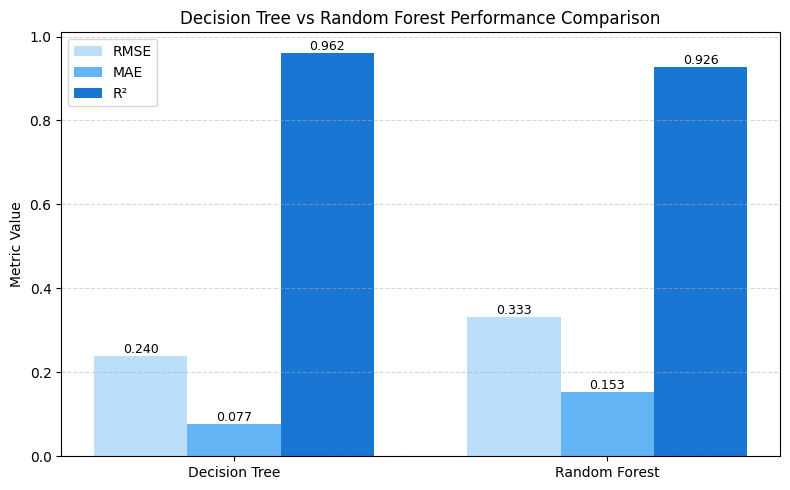

In [ ]:
numeric_features = [
    "Age", "Sleep Duration", "Physical Activity Level",
    "Stress Level", "Heart Rate", "Daily Steps",
    "BloodPressure_Upper_Value", "BloodPressure_Lower_Value"
]
categorical_features = ["Gender", "Occupation"]
ordinal_features = ["BMI Category"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),
        ("ord", OrdinalEncoder(
            categories=[["Normal", "Normal Weight", "Overweight", "Obese"]],
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ), ordinal_features),
    ]
)

dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    n_jobs=-1
)

dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", dt)
])

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", rf)
])

X = df.drop(columns=["Quality of Sleep", "Person ID"])
y = df["Quality of Sleep"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

def evaluate(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return rmse, mae, r2

rmse_dt, mae_dt, r2_dt = evaluate(y_test, y_pred_dt)
rmse_rf, mae_rf, r2_rf = evaluate(y_test, y_pred_rf)

print("MODEL RESULTS")
print("------------------------")

print("Decision Tree")
print("RMSE:", round(rmse_dt, 3))
print("MAE :", round(mae_dt, 3))
print("R2  :", round(r2_dt, 3))

print()

print("Random Forest")
print("RMSE:", round(rmse_rf, 3))
print("MAE :", round(mae_rf, 3))
print("R2  :", round(r2_rf, 3))

# 9) Bar chart (DT vs RF)
models = ["Decision Tree", "Random Forest"]
rmse_values = [rmse_dt, rmse_rf]
mae_values  = [mae_dt, mae_rf]
r2_values   = [r2_dt, r2_rf]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8, 5))

bars_rmse = plt.bar(x - width, rmse_values, width, label="RMSE", color="#bbdefb")
bars_mae  = plt.bar(x,         mae_values,  width, label="MAE",  color="#64b5f6")
bars_r2   = plt.bar(x + width, r2_values,   width, label="R²",   color="#1976d2")

def add_labels(bars):
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h, f"{h:.3f}",
                 ha="center", va="bottom", fontsize=9)

add_labels(bars_rmse)
add_labels(bars_mae)
add_labels(bars_r2)

plt.xticks(x, models)
plt.ylabel("Metric Value")
plt.title("Decision Tree vs Random Forest Performance Comparison")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

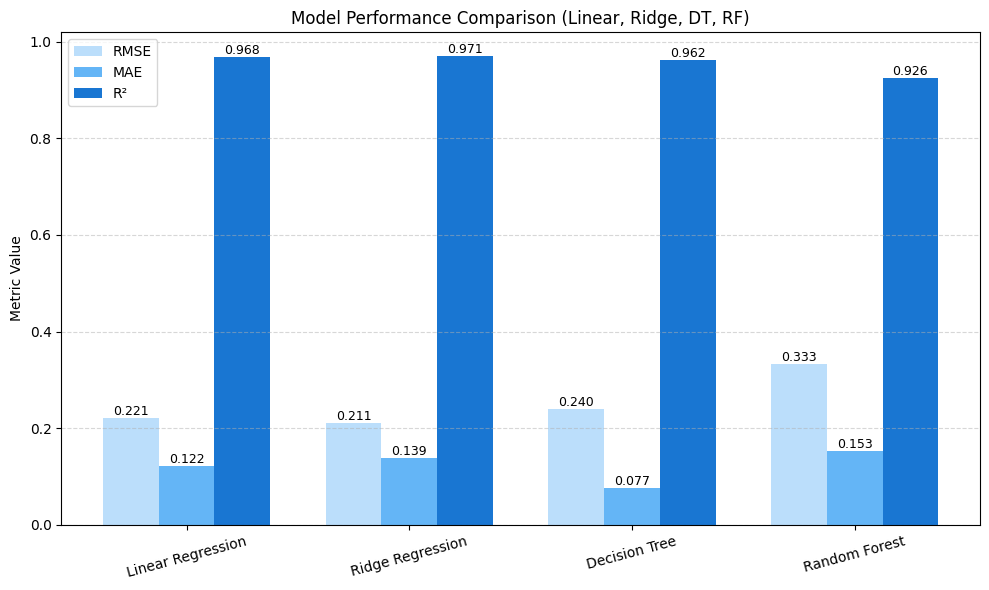

In [ ]:
models = [
    "Linear Regression",
    "Ridge Regression",
    "Decision Tree",
    "Random Forest"
]

rmse_values = [0.221, 0.211, 0.240, 0.333]
mae_values  = [0.122, 0.139, 0.077, 0.153]
r2_values   = [0.968, 0.971, 0.962, 0.926]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))

bars_rmse = plt.bar(x - width, rmse_values, width, label="RMSE", color="#bbdefb")
bars_mae  = plt.bar(x,         mae_values,  width, label="MAE",  color="#64b5f6")
bars_r2   = plt.bar(x + width, r2_values,   width, label="R²",   color="#1976d2")

def add_labels(bars):
    for bar in bars:
        h = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            h,
            f"{h:.3f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

add_labels(bars_rmse)
add_labels(bars_mae)
add_labels(bars_r2)

plt.xticks(x, models, rotation=15)
plt.ylabel("Metric Value")
plt.title("Model Performance Comparison (Linear, Ridge, DT, RF)")

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
